In [3]:
#loading required packages
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#loading data set music instrument
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Musical_instruments_reviews.csv")

In [7]:
#checking dataset info
df.info() #tere are 10261 rows and 9 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [8]:
#checking dataset info
df.info() #tere are 10261 rows and 9 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10261 entries, 0 to 10260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      10261 non-null  object 
 1   asin            10261 non-null  object 
 2   reviewerName    10234 non-null  object 
 3   helpful         10261 non-null  object 
 4   reviewText      10254 non-null  object 
 5   overall         10261 non-null  float64
 6   summary         10261 non-null  object 
 7   unixReviewTime  10261 non-null  int64  
 8   reviewTime      10261 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 721.6+ KB


In [9]:
#checking first five row of dataset
df.head(50)

reviewerID        asin  ... unixReviewTime   reviewTime
0   A2IBPI20UZIR0U  1384719342  ...     1393545600  02 28, 2014
1   A14VAT5EAX3D9S  1384719342  ...     1363392000  03 16, 2013
2   A195EZSQDW3E21  1384719342  ...     1377648000  08 28, 2013
3   A2C00NNG1ZQQG2  1384719342  ...     1392336000  02 14, 2014
4    A94QU4C90B1AX  1384719342  ...     1392940800  02 21, 2014
5   A2A039TZMZHH9Y  B00004Y2UT  ...     1356048000  12 21, 2012
6   A1UPZM995ZAH90  B00004Y2UT  ...     1390089600  01 19, 2014
7    AJNFQI3YR6XJ5  B00004Y2UT  ...     1353024000  11 16, 2012
8   A3M1PLEYNDEYO8  B00004Y2UT  ...     1215302400   07 6, 2008
9    AMNTZU1YQN1TH  B00004Y2UT  ...     1389139200   01 8, 2014
10  A2NYK9KWFMJV4Y  B00004Y2UT  ...     1334793600  04 19, 2012
11  A35QFQI0M46LWO  B00005ML71  ...     1398124800  04 22, 2014
12  A2NIT6BKW11XJQ  B00005ML71  ...     1384646400  11 17, 2013
13  A1C0O09LOLVI39  B00005ML71  ...     1371340800  06 16, 2013
14  A17SLR18TUMULM  B00005ML71  ...     1356912000  12 31, 2012
15  A2PD27UKAD3Q00  B00005ML71  ...     1376697600  08 17, 2013
16   AKSFZ4G1AXYFC  B000068NSX  ...     1376352000  08 13, 2013
17   A67OJZLHBBUQ9  B000068NSX  ...     1373328000   07 9, 2013
18  A2EZWZ8MBEDOLN  B000068NSX  ...     1363564800  03 18, 2013
19  A1CL807EOUPVP1  B000068NSX  ...     1375833600   08 7, 2013
20  A1GMWTGXW682GB  B000068NSX  ...     1331856000  03 16, 2012
21  A2G12DY50U700V  B000068NSX  ...     1390953600  01 29, 2014
22   A3E0CF25A7LD2  B000068NSX  ...     1354924800   12 8, 2012
23  A2W3CLAYZLDPTV  B000068NTU  ...     1341446400   07 5, 2012
24  A398X9POBHK69N  B000068NTU  ...     1383177600  10 31, 2013
25   AXWB93VKVML6K  B000068NTU  ...     1372809600   07 3, 2013
26  A2FZ4Z0UFA1OR8  B000068NTU  ...     1327449600  01 25, 2012
27   AXP9CF1UTFRSU  B000068NTU  ...     1381795200  10 15, 2013
28  A2CCGGDGZ694CT  B000068NVI  ...     1341964800  07 11, 2012
29  A27DR1VO079F1V  B000068NVI  ...     1392768000  02 19, 2014
30  A1LQC225SE8UNI  B000068NVI  ...     1337990400  05 26, 2012
31   AU9BPT3Y3K6J4  B000068NVI  ...     1376092800  08 10, 2013
32  A14Z9LAETO21KL  B000068NVI  ...     1394496000  03 11, 2014
33  A2074KEJGRYJV4  B000068NVI  ...     1379289600  09 16, 2013
34   A7TRK2GG6BHWD  B000068NVI  ...     1325808000   01 6, 2012
35  A319B090A2POEB  B000068NVI  ...     1329004800  02 12, 2012
36  A396ELNTQDFYPO  B000068NVI  ...     1379289600  09 16, 2013
37  A17CU1D2CWXOHB  B000068NVI  ...     1387065600  12 15, 2013
38  A1S0HTDO0P4N5V  B000068NVI  ...     1379376000  09 17, 2013
39  A3DWQW2L39RB1S  B000068NVI  ...     1355443200  12 14, 2012
40   AQQ91U1U4YKDF  B000068NVI  ...     1372464000  06 29, 2013
41   AA5TINW2RJ195  B000068NW5  ...     1405382400  07 15, 2014
42   ABC68JUCPTVOE  B000068NW5  ...     1333152000  03 31, 2012
43  A3W2E6S24BTXXK  B000068NW5  ...     1401235200  05 28, 2014
44  A3872Y2XH0YDX1  B000068NW5  ...     1363132800  03 13, 2013
45  A398X9POBHK69N  B000068NW5  ...     1388966400   01 6, 2014
46  A13A81NN0NRD1S  B000068NW5  ...     1290038400  11 18, 2010
47  A1EUO0BU72JR7T  B000068NW5  ...     1372291200  06 27, 2013
48  A1H4WSC8JWS59N  B000068NW5  ...     1359504000  01 30, 2013
49  A3OXHLG6DIBRW8  B000068NW5  ...     1346803200   09 5, 2012

[50 rows x 9 columns]

In [11]:
#there are 7 observation  missing in review tex we can dicard those rows
df1 = df.dropna(subset= ["reviewText"])

In [12]:
df1.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [13]:
#reviewer name column is not importtant for analysis we can drop that column
df2 = df1.drop("reviewerName",axis = 1)

In [14]:
df2.columns #reviewer name column is droped

Index(['reviewerID', 'asin', 'helpful', 'reviewText', 'overall', 'summary',
       'unixReviewTime', 'reviewTime'],
      dtype='object')

In [15]:
#lets define a function for cleaning the review text which is most important column for analysis
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub(r"[^A-Za-z]"," ",text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [16]:
# Let's take a look at the updated text
df2[['cleaned_review',"cleaned_summary"]] = pd.DataFrame(df2[["reviewText","summary"]].applymap(cleaned1))
df2.head(10)

reviewerID  ...                              cleaned_summary
0  A2IBPI20UZIR0U  ...                                         good
1  A14VAT5EAX3D9S  ...                                         jake
2  A195EZSQDW3E21  ...                         it does the job well
3  A2C00NNG1ZQQG2  ...                good windscreen for the money
4   A94QU4C90B1AX  ...        no more pops when i record my vocals 
5  A2A039TZMZHH9Y  ...                               the best cable
6  A1UPZM995ZAH90  ...  monster standard           instrument cable
7   AJNFQI3YR6XJ5  ...           didn t fit my      fender strat   
8  A3M1PLEYNDEYO8  ...                                  great cable
9   AMNTZU1YQN1TH  ...         best instrument cables on the market

[10 rows x 10 columns]

In [17]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer #to capture dictionary meaning take the help of lemitization
lemitizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [18]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = ' '.join([lemitizer.lemmatize(word) for word in text.split(' ')])
    return text

cleaned2 = lambda x: text_clean_2(x)

In [19]:
# Let's take a look at the updated text
df2[['cleaned_review',"cleaned_summary"]] = pd.DataFrame(df2[["cleaned_review","cleaned_summary"]].applymap(cleaned2))
df2.head(10)

reviewerID  ...                              cleaned_summary
0  A2IBPI20UZIR0U  ...                                         good
1  A14VAT5EAX3D9S  ...                                         jake
2  A195EZSQDW3E21  ...                          it doe the job well
3  A2C00NNG1ZQQG2  ...                good windscreen for the money
4   A94QU4C90B1AX  ...          no more pop when i record my vocal 
5  A2A039TZMZHH9Y  ...                               the best cable
6  A1UPZM995ZAH90  ...  monster standard           instrument cable
7   AJNFQI3YR6XJ5  ...           didn t fit my      fender strat   
8  A3M1PLEYNDEYO8  ...                                  great cable
9   AMNTZU1YQN1TH  ...          best instrument cable on the market

[10 rows x 10 columns]

# TASK - 1

In [20]:
#task--1

#lest lebeled the review with sentiment with the help of textlob package
from textblob import TextBlob
def map_sentiment(x):
    sentiment = []
    x = str(x)
    if TextBlob(str(x)).sentiment.polarity > 0:
        sentiment.append("positive")
    elif TextBlob(str(x)).sentiment.polarity < 0:
        sentiment.append("negative")
    else:
        sentiment.append("neutral")
    return " ".join(sentiment)

In [21]:
#testing fuction
i = "i am good"
j = "i am worst"
map_sentiment(i)

'positive'

In [22]:
#applying function to dataset
df2["sentiment"] = pd.DataFrame(df2.cleaned_review.apply(map_sentiment))

In [23]:
df2[["cleaned_review","sentiment"]].head() #checking both the column

cleaned_review sentiment
0  not much to write about here  but it doe exact...  positive
1  the product doe exactly a it should and is qui...   neutral
2  the primary job of this device is to block the...  positive
3  nice windscreen protects my mxl mic and preven...  positive
4  this pop filter is great  it look and performs...  positive

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


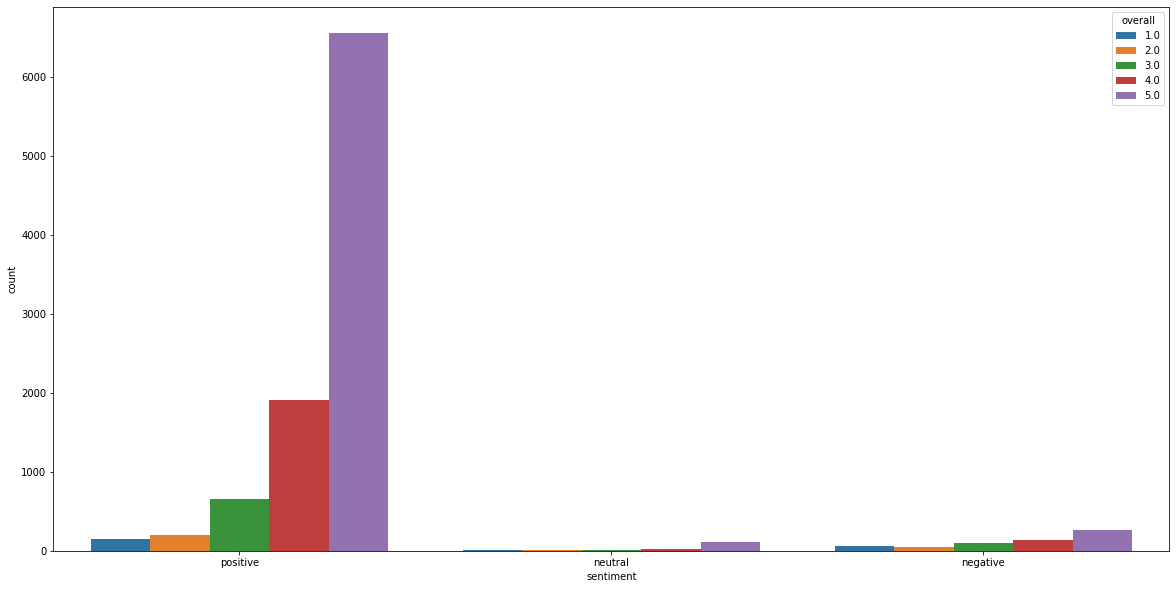

In [24]:
#lets visualize the sentiments of overall data
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(df2["sentiment"],hue=df2["overall"])

In [25]:
#lets see the overall rating value counts
df2.overall.value_counts()

5.0    6932
4.0    2083
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [26]:
#lets see the count of sentiments
df2.sentiment.value_counts()

positive    9476
negative     624
neutral      154
Name: sentiment, dtype: int64

In [27]:
df2.cleaned_review[df2.sentiment == "negative"].values #these are the negative reviews about product

array(['if you are not use to using a large sustaining pedal while playing the piano  it may appear little awkward ',
       'i didn t expect this cable to be so thin  it s easily     the thickness of any guitar cable i ve used  not sure about long term durability or signal loss interference  if i had the foresight i d spend a couple extra buck on a thicker cable   still  it work and wa inexpensive edit    month later and it s dead already   wire frayed at the right angle jack   you get what you pay for ',
       'one end wa loose  so i tightened it  it keep coming loose so i had to put a dab of crazy glue on the thread  hope i don t ever have to open the end for repair ',
       'only complaint is the size which is my fault  if you can buy at least a    foot if you plan to use it on stage ',
       'i m a pro cheapo and i hated this thing  they re noisy  and the cable feel really cheap  gummy like  drop few more buck and get something else ',
       'i own lot of hosa cable they are c

In [28]:
df2.describe(include="all") #lets see the summary of data set
#we can clearly see that maximum reviews are positive tthat mean mode or maximum frequency of data showing positive review

reviewerID        asin  ... cleaned_summary sentiment
count           10254       10254  ...           10254     10254
unique           1429         900  ...            8314         3
top     ADH0O8UVJOT10  B003VWJ2K8  ...           great  positive
freq               42         163  ...              61      9476
mean              NaN         NaN  ...             NaN       NaN
std               NaN         NaN  ...             NaN       NaN
min               NaN         NaN  ...             NaN       NaN
25%               NaN         NaN  ...             NaN       NaN
50%               NaN         NaN  ...             NaN       NaN
75%               NaN         NaN  ...             NaN       NaN
max               NaN         NaN  ...             NaN       NaN

[11 rows x 11 columns]

In [29]:
#lets xtraxt the sentiment polarity of summry column then we can build our model
def extract_polarity(x):
    x = str(x)
    polarity = TextBlob(x).sentiment.polarity
    return polarity
    

In [30]:
df2["summary_polarity"] = df2.cleaned_summary.apply(extract_polarity) #applying the function

In [31]:
df2.head()

reviewerID        asin  ... sentiment summary_polarity
0  A2IBPI20UZIR0U  1384719342  ...  positive             0.70
1  A14VAT5EAX3D9S  1384719342  ...   neutral             0.00
2  A195EZSQDW3E21  1384719342  ...  positive             0.00
3  A2C00NNG1ZQQG2  1384719342  ...  positive             0.70
4   A94QU4C90B1AX  1384719342  ...  positive            -0.25

[5 rows x 12 columns]

In [32]:
#now lets build the tf_idf vectorizer matrix for model building on review text 
#before that lets remove all the stopwarrds

In [34]:
with open("/content/drive/MyDrive/Colab Notebooks/stopwords_en.txt","r") as sw:
    stop_words = sw.read()
    
stop_words = stop_words.split("\n") #loading cosum stopwords

In [35]:
len(stop_words) #there are 572 stopwards in list

572

In [36]:
#building a function for removing stopwards
#from autocorrect import Speller # Library to check typos
#spell = Speller(lang='en')
def remove_stopwords(x):
    y = " ".join([w for w in x.split(" ") if w not in stop_words])
    return y

In [37]:
df2["cleaned_stopword_review"] = df2.cleaned_review.apply(remove_stopwords)

In [38]:
tfidf = TfidfVectorizer() #instantiate vectorizer
df2_vectors_tfidf = tfidf.fit_transform(df2.cleaned_stopword_review) #fitting vectorizer

In [39]:
vector_dataframe = pd.DataFrame(df2_vectors_tfidf.todense(),columns=tfidf.get_feature_names()) #converting to dataframe

In [40]:
vector_dataframe.head() #huge dimension now i am going to take the pca of this data

aa  aaa  aaaand   ab  aback  ...  zwent  zylgian   zz  zzounds  zzvhgwcolor
0  0.0  0.0     0.0  0.0    0.0  ...    0.0      0.0  0.0      0.0          0.0
1  0.0  0.0     0.0  0.0    0.0  ...    0.0      0.0  0.0      0.0          0.0
2  0.0  0.0     0.0  0.0    0.0  ...    0.0      0.0  0.0      0.0          0.0
3  0.0  0.0     0.0  0.0    0.0  ...    0.0      0.0  0.0      0.0          0.0
4  0.0  0.0     0.0  0.0    0.0  ...    0.0      0.0  0.0      0.0          0.0

[5 rows x 16581 columns]

In [41]:
from sklearn.decomposition import PCA #imprting package
pca = PCA(n_components=10) #taking 10 most valuable princpal compnents
pca_vecor = pca.fit_transform(vector_dataframe)
pc_data_frame = pd.DataFrame(pca_vecor,columns=["pc1","pc2","pc3","pc4","pc5","pc6","pc7","pc8","pc9","pc10"]) #crating pca dataframe
final_data = pd.concat([pc_data_frame,df2[["summary_polarity","overall"]]],axis = 1) #concat two dataframe

In [42]:
final_data.head() #this is the final data from on which the model will be built

pc1       pc2       pc3  ...      pc10  summary_polarity  overall
0 -0.051922 -0.011778 -0.016599  ...  0.024092              0.70      5.0
1 -0.055339  0.018874 -0.026971  ...  0.035997              0.00      5.0
2 -0.042699  0.009775 -0.021048  ...  0.004418              0.00      5.0
3 -0.044305  0.036373 -0.016439  ... -0.014033              0.70      5.0
4 -0.055299  0.008255 -0.011505  ... -0.030058             -0.25      5.0

[5 rows x 12 columns]

In [43]:
final_data = final_data.dropna() #re checking and droping nan values
final_data.isna().sum()

pc1                 0
pc2                 0
pc3                 0
pc4                 0
pc5                 0
pc6                 0
pc7                 0
pc8                 0
pc9                 0
pc10                0
summary_polarity    0
overall             0
dtype: int64

In [44]:
final_data.overall.value_counts() #here the classes are clealy imbalanced

5.0    6929
4.0    2080
3.0     771
2.0     250
1.0     217
Name: overall, dtype: int64

In [45]:
from imblearn.over_sampling import SMOTE #here i am takeing the help of over sampling to make the dataset balanced
x = final_data.drop("overall",axis=1)
y = final_data["overall"]
print("before over sampling")
print(x.shape,y.shape)
print(y.value_counts())
over_sample= SMOTE()
x,y = over_sample.fit_resample(x, y)
print("after over sampling")
print(x.shape,y.shape)
print(pd.DataFrame(y).value_counts())

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

before over sampling
(10247, 11) (10247,)
5.0    6929
4.0    2080
3.0     771
2.0     250
1.0     217
Name: overall, dtype: int64
after over sampling
(34645, 11) (34645,)
5.0    6929
4.0    6929
3.0    6929
2.0    6929
1.0    6929
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [46]:
  #spliting the dataset into train and test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=217) #taking 25% of data into test observation

In [47]:
pd.DataFrame(y_train).value_counts()


4.0    5229
3.0    5215
1.0    5201
5.0    5176
2.0    5162
dtype: int64

# TASK - 2 & 3
## MODEL BUILDING AND EVALUATION WITH ACCURACY ,PRECISION ,RECALL AND F1-SCORE

In [48]:
#votting classifier
from sklearn import datasets, linear_model, tree, neighbors, naive_bayes
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,classification_report

In [49]:
#insta(ntiate the learner
l1 = linear_model.LogisticRegression(multi_class= 'multinomial')
l2 = naive_bayes.BernoulliNB(alpha=1.5)
l3 = neighbors.KNeighborsClassifier()

In [50]:
#instantiate the voting classigier
voting = VotingClassifier(estimators=([("logistic",l1),("nb",l2),("knn",l3)]),voting="hard")

In [51]:
#fitting the votting classifier
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('nb',
                              BernoulliNB(alpha=1.5, binarize=0.0,
                                          class_prior=None, fit_prior=True)),
                             ('knn',
                              KNeighborsClassifier(algorith

In [52]:
# Predict the most voted class 
hard_predictions = voting.predict(x_test)
# Accuracy of hard voting on test data
print(pd.crosstab(y_test, hard_predictions))
print('Hard Voting:', accuracy_score(y_test, hard_predictions))

col_0   1.0  2.0  3.0  4.0  5.0
row_0                          
1.0    1371  174   51   69   63
2.0     735  711   36  139  146
3.0     530  263  538  122  261
4.0     408  160  201  462  469
5.0     381  169  187  225  791
Hard Voting: 0.4471253752020319


In [53]:
#predict accuacy on training data
hard_predictions = voting.predict(x_train)
print('Hard Voting training:', accuracy_score(y_train, hard_predictions))

Hard Voting training: 0.45352730631566796


In [54]:
#lets try with soft voting
l4 = neighbors.KNeighborsClassifier(n_neighbors = 7)
l5 = naive_bayes.GaussianNB()
l6 = linear_model.LogisticRegression()

In [55]:
#instatinate softvotting
soft_vote = VotingClassifier(estimators=([("knn",l4),("nb",l5),("logistic",l6)]),voting="soft")

In [56]:
soft_vote.fit(x_train,y_train)

VotingClassifier(estimators=[('knn',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=7,
                                                   p=2, weights='uniform')),
                             ('nb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('logistic',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
   

In [57]:
# Predict the most voted class 
soft_predictions = soft_vote.predict(x_test)
# Accuracy of hard voting on test data
print('soft Voting:', classification_report(y_test,soft_predictions))

soft Voting:               precision    recall  f1-score   support

         1.0       0.80      0.96      0.87      1728
         2.0       0.82      0.94      0.88      1767
         3.0       0.78      0.85      0.82      1714
         4.0       0.69      0.61      0.65      1700
         5.0       0.65      0.44      0.53      1753

    accuracy                           0.76      8662
   macro avg       0.75      0.76      0.75      8662
weighted avg       0.75      0.76      0.75      8662



In [58]:
#predict accuacy on training data
soft_predictions = soft_vote.predict(x_train)
print('soft Voting training:', classification_report(y_train, soft_predictions))

soft Voting training:               precision    recall  f1-score   support

         1.0       0.82      0.97      0.89      5201
         2.0       0.85      0.94      0.89      5162
         3.0       0.81      0.89      0.85      5215
         4.0       0.78      0.71      0.75      5229
         5.0       0.73      0.51      0.60      5176

    accuracy                           0.81     25983
   macro avg       0.80      0.81      0.80     25983
weighted avg       0.80      0.81      0.80     25983



In [ ]:
#lets try with random forest
from sklearn.ensemble import RandomForestClassifier

rand = RandomForestClassifier(n_estimators=1001, n_jobs=1, random_state=42,criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='auto')

rand.fit(x_train, y_train)


print(pd.crosstab(y_test, rand.predict(x_test)))

col_0   1.0   2.0   3.0  4.0  5.0
row_0                            
1.0    1560    89    42   22   15
2.0     202  1473    52   30   10
3.0     233   176  1126  116   63
4.0     214   153   211  854  268
5.0     227   171   226  355  774


In [ ]:
print(classification_report(y_test, rand.predict(x_test)))

              precision    recall  f1-score   support

         1.0       0.64      0.90      0.75      1728
         2.0       0.71      0.83      0.77      1767
         3.0       0.68      0.66      0.67      1714
         4.0       0.62      0.50      0.56      1700
         5.0       0.68      0.44      0.54      1753

    accuracy                           0.67      8662
   macro avg       0.67      0.67      0.66      8662
weighted avg       0.67      0.67      0.66      8662



In [59]:
#lets try the model with neural netork
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM

In [60]:
##model building to classify sentiments and overall ratings both

In [61]:
#checking the distribution of output variable whether it is balanced or imbalnced
df2.sentiment.value_counts() #this is showing imbalanced data

positive    9476
negative     624
neutral      154
Name: sentiment, dtype: int64

In [ ]:
#here i am going to build classifier using stacked  lstm and word embeding method because it capture the context of words

In [63]:
#for sentiment classification
x = df2.cleaned_review
y = df2.sentiment
#for overall rating  classification
x1 = df2.cleaned_review
y1 = df2.overall
from sklearn.preprocessing import  LabelEncoder
from imblearn.over_sampling import RandomOverSampler
leb = LabelEncoder()
y = leb.fit_transform(y)
y1 = leb.fit_transform(y1)
print("before over sampling")
print(x.shape,y.shape)
print(pd.DataFrame(y).value_counts())
over_sample= RandomOverSampler(random_state=102)
over_sample1 = RandomOverSampler(random_state=103)
#for sentiment
x,y = over_sample.fit_resample(x.values.reshape(-1,1), y)
#for overallrating
x1,y1 = over_sample1.fit_resample(x1.values.reshape(-1,1), y1)
print("after over sampling")
print(x.shape,y.shape)
print(pd.DataFrame(y).value_counts())

before over sampling
(10254,) (10254,)
2    9476
0     624
1     154
dtype: int64
after over sampling
(28428, 1) (28428,)
2    9476
1    9476
0    9476
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [64]:
### Vocabulary size
voc_size=10000

In [65]:
#Onehot Representation for sentiment

In [66]:
onehot_repr_sentiment=[one_hot(" ".join(words),voc_size)for words in x] 
onehot_repr_sentiment

[[2878,
  3035,
  1280,
  4864,
  1641,
  2697,
  8146,
  3597,
  9066,
  8762,
  3126,
  3597,
  3130,
  6345,
  1280,
  357,
  2849,
  9095,
  4869,
  3131,
  4557,
  1879,
  3172,
  3020,
  3035,
  167,
  2974,
  3597,
  4267,
  7216,
  5496,
  9095,
  7071,
  2701,
  4869,
  357,
  8311,
  5145,
  3855,
  6928,
  4099,
  3313,
  2571,
  3597,
  9981,
  1660,
  9906,
  9095,
  8401,
  7113,
  2350,
  1805],
 [9095,
  3873,
  9066,
  8762,
  4099,
  3597,
  4953,
  7282,
  4267,
  806,
  1902,
  85,
  7413,
  2878,
  6978,
  3597,
  6348,
  7702,
  9009,
  2784,
  3597,
  2277,
  3855,
  3597,
  6348,
  3114,
  8807,
  639,
  85,
  5881,
  324,
  4099,
  9538,
  8789,
  6111,
  7216,
  5496,
  9095,
  7806,
  7026,
  4099,
  6446,
  1597,
  5496,
  9095,
  7877,
  5496,
  9538,
  7497,
  3123,
  6623,
  85,
  496,
  1280,
  2571,
  3855,
  2649,
  2815,
  3130,
  6755,
  85,
  4599,
  6359,
  1385,
  9095,
  4869,
  357,
  8092,
  1280,
  1879,
  926,
  7282,
  5667,
  3597,
  5472,


In [67]:
onehot_repr_ratings=[one_hot(" ".join(words),voc_size)for words in x1] 
##Onehot Representation for ratings

In [68]:
#Embedding Representation for sentiment

In [69]:
sent_length=80
embedded_docs_sentiment = pad_sequences(onehot_repr_sentiment,padding='pre',maxlen=sent_length)
print(embedded_docs_sentiment)

[[   0    0    0 ... 7113 2350 1805]
 [ 639   85 5881 ... 2571 9290 3873]
 [   0    0    0 ... 3765 8571 3597]
 ...
 [   0    0    0 ... 9066 9095 8060]
 [   0    0    0 ... 4099 5886 3873]
 [   0    0    0 ... 9296 7088 9450]]


In [70]:
#Embedding Representation for ratings
sent_length=80
embedded_docs_ratings = pad_sequences(onehot_repr_ratings,padding='pre',maxlen=sent_length)
print(embedded_docs_ratings)

[[   0    0    0 ... 7113 2350 1805]
 [ 639   85 5881 ... 2571 9290 3873]
 [   0    0    0 ... 3765 8571 3597]
 ...
 [   0    0    0 ... 1011 3470 3597]
 [7469 7282 9095 ... 4099 4482 6703]
 [   0    0    0 ... 3597 1136 6445]]


In [71]:
len(embedded_docs_ratings[0])

80

In [72]:
len(embedded_docs_sentiment[0])

80

In [73]:
## Creating model for sentiment classification
embedding_vector_features=80
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(200,return_sequences=True))
model.add(LSTM(300))
model.add(Dense(3,activation='softmax'))
model.compile(loss= tensorflow.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 80, 80)            800000    
_________________________________________________________________
lstm (LSTM)                  (None, 80, 100)           72400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 80, 200)           240800    
_________________________________________________________________
lstm_2 (LSTM)                (None, 300)               601200    
_________________________________________________________________
dense (Dense)                (None, 3)                 903       
Total params: 1,715,303
Trainable params: 1,715,303
Non-trainable params: 0
_________________________________________________________________
None


In [74]:
#converting sentiment data to numpy array
X_final_sentiment=np.array(embedded_docs_sentiment)
y_final_sentiment=np.array(y)

In [75]:
#spliting into train test data
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_final_sentiment, y_final_sentiment, test_size=0.33, random_state=42)

In [76]:
### Finally Training
model.fit(X_train_sentiment,y_train_sentiment,validation_data=(X_test_sentiment,y_test_sentiment),epochs=10,batch_size=64)

Epoch 1/10
298/298 [==============================] - 46s 121ms/step - loss: 0.4555 - accuracy: 0.7678 - val_loss: 0.1765 - val_accuracy: 0.9355
Epoch 2/10
298/298 [==============================] - 34s 116ms/step - loss: 0.1031 - accuracy: 0.9657 - val_loss: 0.0865 - val_accuracy: 0.9727
Epoch 3/10
298/298 [==============================] - 34s 115ms/step - loss: 0.0405 - accuracy: 0.9880 - val_loss: 0.0575 - val_accuracy: 0.9856
Epoch 4/10
298/298 [==============================] - 34s 115ms/step - loss: 0.0329 - accuracy: 0.9918 - val_loss: 0.0556 - val_accuracy: 0.9866
Epoch 5/10
298/298 [==============================] - 34s 116ms/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 0.1125 - val_accuracy: 0.9766
Epoch 6/10
298/298 [==============================] - 34s 116ms/step - loss: 0.0105 - accuracy: 0.9977 - val_loss: 0.0766 - val_accuracy: 0.9820
Epoch 7/10
298/298 [==============================] - 34s 116ms/step - loss: 0.0114 - accuracy: 0.9974 - val_loss: 0.0698 - val_ac

In [77]:
y_pred_sentiment= np.argmax(model.predict(X_test_sentiment),axis=1)

In [78]:
y_pred_sentiment

array([2, 1, 1, ..., 1, 1, 0])

In [79]:
print(classification_report(y_test_sentiment,y_pred_sentiment))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3164
           1       1.00      1.00      1.00      3115
           2       1.00      0.97      0.98      3103

    accuracy                           0.99      9382
   macro avg       0.99      0.99      0.99      9382
weighted avg       0.99      0.99      0.99      9382



In [81]:
#now lets build model for overall rating prediction
embedding_vector_features=80
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(LSTM(150,return_sequences=True))
model2.add(LSTM(250,return_sequences=True))
model2.add(LSTM(300))
model2.add(Dense(5,activation='softmax'))
model2.compile(loss= tensorflow.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 80)            800000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 80, 150)           138600    
_________________________________________________________________
lstm_7 (LSTM)                (None, 80, 250)           401000    
_________________________________________________________________
lstm_8 (LSTM)                (None, 300)               661200    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1505      
Total params: 2,002,305
Trainable params: 2,002,305
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
#converting sentiment data to numpy array
X_final_rating=np.array(embedded_docs_ratings)
y_final_rating=np.array(y1)

In [83]:
#spliting into train test data
X_train_rating, X_test_rating, y_train_rating, y_test_rating = train_test_split(X_final_rating, y_final_rating, test_size=0.35, random_state=44)

In [84]:
### Finally Training on rating data
model2.fit(X_train_rating,y_train_rating,validation_data=(X_test_rating,y_test_rating),epochs=10,batch_size=64)

Epoch 1/10
353/353 [==============================] - 53s 136ms/step - loss: 0.8772 - accuracy: 0.5964 - val_loss: 0.5761 - val_accuracy: 0.7235
Epoch 2/10
353/353 [==============================] - 46s 132ms/step - loss: 0.4385 - accuracy: 0.7980 - val_loss: 0.3843 - val_accuracy: 0.8187
Epoch 3/10
353/353 [==============================] - 46s 132ms/step - loss: 0.3032 - accuracy: 0.8695 - val_loss: 0.3514 - val_accuracy: 0.8566
Epoch 4/10
353/353 [==============================] - 46s 132ms/step - loss: 0.2100 - accuracy: 0.9165 - val_loss: 0.3078 - val_accuracy: 0.8749
Epoch 5/10
353/353 [==============================] - 46s 132ms/step - loss: 0.1613 - accuracy: 0.9419 - val_loss: 0.2893 - val_accuracy: 0.9034
Epoch 6/10
353/353 [==============================] - 46s 132ms/step - loss: 0.1291 - accuracy: 0.9535 - val_loss: 0.3196 - val_accuracy: 0.8984
Epoch 7/10
353/353 [==============================] - 46s 132ms/step - loss: 0.0818 - accuracy: 0.9729 - val_loss: 0.3220 - val_ac

In [87]:
#here after 10 epoch the model is kind of overfiiting that means verygood train accuracy but little bit lower test accuracy
#so here i will add some drop out layer to reduce the overfitting
model2=Sequential()
model2.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model2.add(LSTM(150,return_sequences=True))
model2.add(Dropout(.2))
model2.add(tensorflow.keras.layers.BatchNormalization())
model2.add(LSTM(250,return_sequences=True))
model2.add(Dropout(.2))
model2.add(tensorflow.keras.layers.BatchNormalization())
model2.add(LSTM(300))
model2.add(Dense(5,activation='softmax'))
model2.compile(loss= tensorflow.keras.losses.SparseCategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 80, 80)            800000    
_________________________________________________________________
lstm_12 (LSTM)               (None, 80, 150)           138600    
_________________________________________________________________
dropout (Dropout)            (None, 80, 150)           0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 80, 150)           600       
_________________________________________________________________
lstm_13 (LSTM)               (None, 80, 250)           401000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 80, 250)           0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 80, 250)          

In [88]:
model2.fit(X_train_rating,y_train_rating,validation_data=(X_test_rating,y_test_rating),epochs=10,batch_size=64) 
#fitthe model with raing data

Epoch 1/10
353/353 [==============================] - 56s 142ms/step - loss: 0.7548 - accuracy: 0.6805 - val_loss: 1.1814 - val_accuracy: 0.4676
Epoch 2/10
353/353 [==============================] - 49s 138ms/step - loss: 0.3281 - accuracy: 0.8677 - val_loss: 0.3440 - val_accuracy: 0.8627
Epoch 3/10
353/353 [==============================] - 49s 138ms/step - loss: 0.2127 - accuracy: 0.9168 - val_loss: 0.7907 - val_accuracy: 0.7298
Epoch 4/10
353/353 [==============================] - 49s 138ms/step - loss: 0.1969 - accuracy: 0.9280 - val_loss: 0.5293 - val_accuracy: 0.8358
Epoch 5/10
353/353 [==============================] - 49s 138ms/step - loss: 0.1477 - accuracy: 0.9478 - val_loss: 0.2816 - val_accuracy: 0.9101
Epoch 6/10
353/353 [==============================] - 49s 138ms/step - loss: 0.0844 - accuracy: 0.9699 - val_loss: 0.2839 - val_accuracy: 0.9110
Epoch 7/10
353/353 [==============================] - 49s 138ms/step - loss: 0.0591 - accuracy: 0.9794 - val_loss: 0.2870 - val_ac

In [90]:
#model evaluation of rating
y_pred_ratings= np.argmax(model2.predict(X_test_rating),axis=1)
print(classification_report(y_test_rating,y_pred_ratings))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2391
           1       0.95      1.00      0.98      2453
           2       0.96      0.97      0.97      2421
           3       0.81      0.90      0.85      2447
           4       0.89      0.72      0.80      2419

    accuracy                           0.92     12131
   macro avg       0.92      0.92      0.92     12131
weighted avg       0.92      0.92      0.92     12131



###### above all the model stacked lstm model is showing more than 92% accuracy with good precision recall and f1 score
###### so the final best model will be stacked lstm with word embeding techniques

# TASK - 4
### MORE EDA ON TEXT REVIEW FOR BETTER UNDERSTANDING

In [92]:
#more EDA NOw i will form wordclouds on overall reviews and form the positive and negative sentiment analysis
reviews = []
for i in df2.cleaned_stopword_review:
    reviews.append(i)
all_reviews = " ".join(reviews)

In [93]:
print(all_reviews)

write  doe supposed  filter pop sound  recording crisp  lowest price pop filter amazon buy  honestly work pricing  product doe affordable realized wa double screened arrived  wa expected added bonus  screen carry small hint smell grape candy buy  reminiscent sake  stop putting pop filter nose smelling recording   dif needed pop filter  work expensive  pleasing aroma mine buy product     primary job device block breath produce popping sound  allowing voice pas noticeable reduction volume high frequency  double cloth filter block pop voice coloration  metal clamp mount attache mike stand secure attached  goose neck coaxing stay put  nice windscreen protects mxl mic prevents pop  thing gooseneck marginally hold screen position requires careful positioning clamp avoid sagging  pop filter great  performs studio filter  recording vocal eliminate pop recorded sing  good bought   love heavy cord gold connector   bass sound great   learned night coil   guess read instruction carefully   harm  w

In [94]:
# words that contained in music_instrument review
reviews_words = all_reviews.split()
reviews_words

['write',
 'doe',
 'supposed',
 'filter',
 'pop',
 'sound',
 'recording',
 'crisp',
 'lowest',
 'price',
 'pop',
 'filter',
 'amazon',
 'buy',
 'honestly',
 'work',
 'pricing',
 'product',
 'doe',
 'affordable',
 'realized',
 'wa',
 'double',
 'screened',
 'arrived',
 'wa',
 'expected',
 'added',
 'bonus',
 'screen',
 'carry',
 'small',
 'hint',
 'smell',
 'grape',
 'candy',
 'buy',
 'reminiscent',
 'sake',
 'stop',
 'putting',
 'pop',
 'filter',
 'nose',
 'smelling',
 'recording',
 'dif',
 'needed',
 'pop',
 'filter',
 'work',
 'expensive',
 'pleasing',
 'aroma',
 'mine',
 'buy',
 'product',
 'primary',
 'job',
 'device',
 'block',
 'breath',
 'produce',
 'popping',
 'sound',
 'allowing',
 'voice',
 'pas',
 'noticeable',
 'reduction',
 'volume',
 'high',
 'frequency',
 'double',
 'cloth',
 'filter',
 'block',
 'pop',
 'voice',
 'coloration',
 'metal',
 'clamp',
 'mount',
 'attache',
 'mike',
 'stand',
 'secure',
 'attached',
 'goose',
 'neck',
 'coaxing',
 'stay',
 'put',
 'nice',
 'w

In [95]:
#removing influencial words and extend the stopwords dictionary
stop_words.extend(['doe','wa','nice','good','amp','ha','time','ve','bit','don','lot','product','thing','great','bought','easy','play','pick'])
reviews_words = [w for w in reviews_words if w not  in stop_words]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

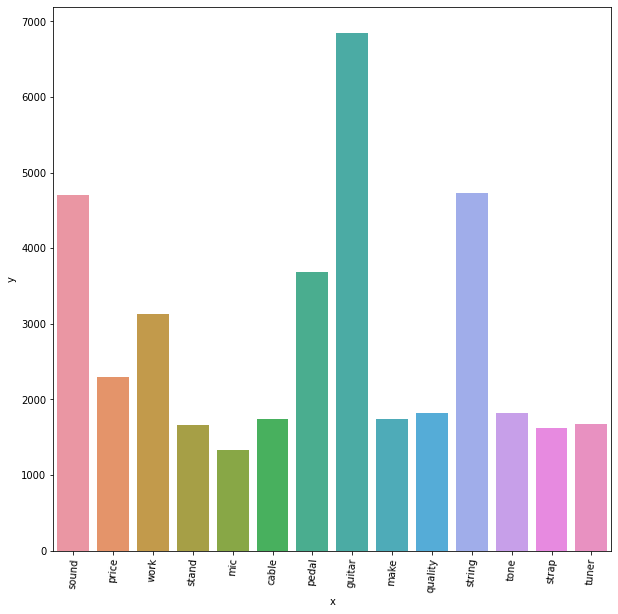

In [96]:
#visualize word frequency
from collections import Counter
a = Counter(reviews_words)
b = dict(a)
df3 = pd.DataFrame(columns=["x","y"])
df3["x"] = [i for i,j in b.items()]
df3["y"] = [j for i,j in b.items()]
df4 = df3[df3["y"] >1300]
df4
plt.figure(figsize=(10,10))
sns.barplot(x="x",y="y",data=df4)

plt.xticks(rotation=85)

In [97]:
# Joinining all the reviews into single paragraph 
rev_string = " ".join(reviews_words)

(-0.5, 1799.5, 1399.5, -0.5)

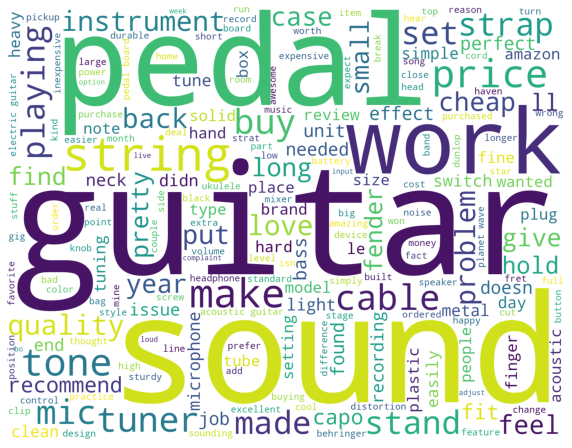

In [98]:
# WordCloud can be performed on the string inputs.
# Corpus level word cloud
from wordcloud import WordCloud
wordcloud_music = WordCloud(
                      background_color='White',
                      width=1800,
                      height=1400
                     ).generate(rev_string)
plt.figure(figsize=(10,20))
plt.imshow(wordcloud_music)
plt.axis("off")

In [99]:
#the more number of costomeres are talking about guitar,pedal cable and mic 
#we need to go back to review text and check those review because those are more important

In [101]:
# positive words # Choose the path for +ve words stored in system
with open("/content/drive/MyDrive/Colab Notebooks/positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")

# Positive word cloud
# Choosing the only words which are present in positive words
ip_pos_in_pos = " ".join ([w for w in reviews_words if w in poswords])

wordcloud_pos_music_pos = WordCloud(
                      background_color='green',
                      width=1800,
                      height=1400
                     ).generate(ip_pos_in_pos)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud_pos_music_pos)
plt.axis("off")

(-0.5, 1799.5, 1399.5, -0.5)

In [102]:
# negative words Choose path for -ve words stored in system
with open("/content/drive/MyDrive/Colab Notebooks/negative-words.txt", "r") as neg:
    negwords = neg.read().split("\n")

# negative word cloud
# Choosing the only words which are present in negwords
music_neg = " ".join ([w for w in reviews_words if w in negwords])

wordcloud_neg = WordCloud(
                      background_color='red',
                      width=1800,
                      height=1400
                     ).generate(music_neg)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud_neg)
plt.axis("off")

(-0.5, 1799.5, 1399.5, -0.5)

In [103]:
#so more people are telling about noise ,problem and some are saying expensive 
#so we need to go back to review and look those review care fully

In [104]:
# wordcloud with bigram
bigrams_list = list(nltk.bigrams(reviews_words))
print(bigrams_list)

dictionary2 = [' '.join(tup) for tup in bigrams_list]
print (dictionary2)

# Using count vectoriser to view the frequency of bigrams
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{'write supposed': 223247,
 'supposed filter': 195884,
 'filter pop': 67508,
 'pop sound': 144578,
 'sound recording': 182382,
 'recording crisp': 159180,
 'crisp lowest': 42553,
 'lowest price': 111346,
 'price pop': 148674,
 'pop filter': 144526,
 'filter amazon': 67403,
 'amazon buy': 5707,
 'buy honestly': 23589,
 'honestly work': 89700,
 'work pricing': 221397,
 'pricing affordable': 149129,
 'affordable realized': 4295,
 'realized double': 157124,
 'double screened': 52340,
 'screened arrived': 168291,
 'arrived expected': 8244,
 'expected added': 61472,
 'added bonus': 2670,
 'bonus screen': 18076,
 'screen carry': 168167,
 'carry small': 27051,
 'small hint': 177952,
 'hint smell': 88095,
 'smell grape': 178465,
 'grape candy': 78965,
 'candy buy': 25765,
 'buy reminiscent': 23783,
 'reminiscent sake': 160841,
 'sake stop': 166979,
 'stop putting': 189392,
 'putting pop': 153676,
 'filter nose': 67496,
 'nose smelling': 127165,
 'smelling recording': 178500,
 'recording dif': 1

[('acoustic guitar', 384), ('electric guitar', 314), ('planet wave', 270), ('pedal board', 255), ('highly recommend', 227), ('le paul', 226), ('guitar string', 215), ('work fine', 214), ('power supply', 209), ('mic stand', 199), ('guitar strap', 187), ('gig bag', 178), ('high quality', 173), ('guitar sound', 168), ('acoustic electric', 167), ('highly recommended', 166), ('sound quality', 160), ('ernie ball', 160), ('strap lock', 158), ('string guitar', 156), ('string sound', 151), ('year ago', 149), ('guitar stand', 144), ('guitar case', 133), ('guitar player', 128), ('effect pedal', 123), ('string string', 122), ('distortion pedal', 122), ('stay tune', 119), ('build quality', 118), ('playing guitar', 111), ('high end', 109), ('guitar bass', 103), ('pop filter', 100), ('change string', 99), ('music stand', 98), ('bass guitar', 93), ('set string', 91), ('low end', 90), ('solid state', 88), ('work perfectly', 86), ('give star', 86), ('addario string', 86), ('bottom line', 84), ('price ra

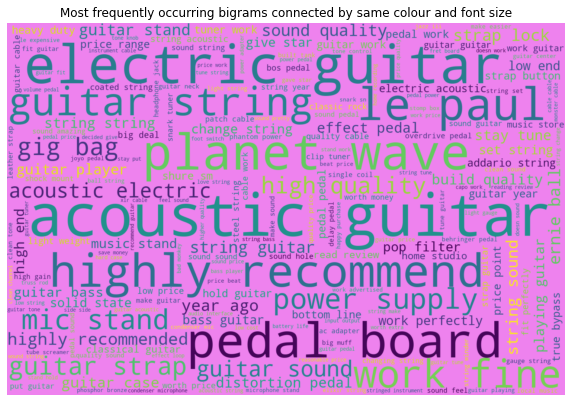

In [105]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
print(words_freq[:100])

# Generating wordcloud
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(background_color='violet',max_words=WC_max_words, height=WC_height, width=WC_width, stopwords=stop_words)
wordCloud.generate_from_frequencies(words_dict)

plt.figure(figsize=(10,10))
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


### most numbers of people are telling about accuistic guitar,electric guitar and guitar string
### so we should give more focous on guitar
### some peopls are also talking about the power supply 
### mic stand also taken into consideration 
### these are all abouts the explaratory and sentimate analysis and positive and negative wprd cloud formation